# Homework 1

## Valutazione run 1
- Stoplist, Porter Stemmer, BM25

In [374]:
eval_run_1 = open('run1/eval/BM25b0.75_0.txt','r')
lines = eval_run_1.readlines()
# stampo i valori map, rprec e precision @ 10 
map_1 = lines[1355].split()
print("Mean Average Precision: ",map_1[2])
rprec_1 = lines[1357].split()
print("RPrecision: ",rprec_1[2])
prec_at_10_1 = lines[1372].split()
print("Precision at 10: ",prec_at_10_1[2])

Mean Average Precision:  0.2125
RPrecision:  0.2705
Precision at 10:  0.4820


## Valutazione run 2
- Stoplist, Porter Stemmer, TF*IDF

In [375]:
eval_run_2 = open('run2/eval/TF_IDF_1.txt','r')
lines = eval_run_2.readlines()
# stampo i valori map, rprec e precision @ 10 
map_2 = lines[1355].split()
print("Mean Average Precision: ",map_2[2])
rprec_2 = lines[1357].split()
print("RPrecision: ",rprec_2[2])
prec_at_10_2 = lines[1372].split()
print("Precision at 10: ",prec_at_10_2[2])

Mean Average Precision:  0.2123
RPrecision:  0.2725
Precision at 10:  0.4780


## Valutazione run 3
- No stoplist, Porter Stemmer, BM25

In [376]:
eval_run_3 = open('run3/eval/BM25b0.75_2.txt','r')
lines = eval_run_3.readlines()
# stampo i valori map, rprec e precision @ 10 
map_3 = lines[1355].split()
print("Mean Average Precision: ",map_3[2])
rprec_3 = lines[1357].split()
print("RPrecision: ",rprec_3[2])
prec_at_10_3 = lines[1372].split()
print("Precision at 10: ",prec_at_10_3[2])

Mean Average Precision:  0.1245
RPrecision:  0.1701
Precision at 10:  0.3020


## Valutazione run 4
- No stoplist, no Porter Stemmer, TF*IDF

In [377]:
eval_run_4 = open('run4/eval/TF_IDF_3.txt','r')
lines = eval_run_4.readlines()
# stampo i valori map, rprec e precision @ 10 
map_4 = lines[1355].split()
print("Mean Average Precision: ",map_4[2])
rprec_4 = lines[1357].split()
print("RPrecision: ",rprec_4[2])
prec_at_10_4 = lines[1372].split()
print("Precision at 10: ",prec_at_10_4[2])

Mean Average Precision:  0.1876
RPrecision:  0.2485
Precision at 10:  0.4260


In [378]:
import matplotlib.pyplot as plt
import pandas as pd

# matrice che associa ad ogni run il rispettivo map
map_list = np.array([
    [1,float(map_1[2])],
    [2,float(map_2[2])],
    [3,float(map_3[2])],
    [4,float(map_4[2])]
])
# matrice che associa ad ogni run il rispetivo rprec
rprec_list = np.array([
    [1,float(rprec_1[2])],
    [2,float(rprec_2[2])],
    [3,float(rprec_3[2])],
    [4,float(rprec_4[2])]
])

# matrice che associa ad ogni run il rispettivo precision at 10
prec_at_10_list = np.array([
    [1,float(prec_at_10_1[2])],
    [2,float(prec_at_10_2[2])],
    [3,float(prec_at_10_3[2])],
    [4,float(prec_at_10_4[2])]
])

In [379]:
df = pd.DataFrame({
    'Run' : map_list[:,0],
    'MAP' : map_list[:,1],
    'RPrecision' : rprec_list[:,1],
    'Precision at 10' : prec_at_10_list[:,1]
})
df.set_index('Run',inplace=True)
#df.style.apply(highlight_max,subset=['MAP','RPrecision','Precision at 10'])

df

,MAP,RPrecision,Precision at 10
Run,,,
1.0,0.2125,0.2705,0.482
2.0,0.2123,0.2725,0.478
3.0,0.1245,0.1701,0.302
4.0,0.1876,0.2485,0.426


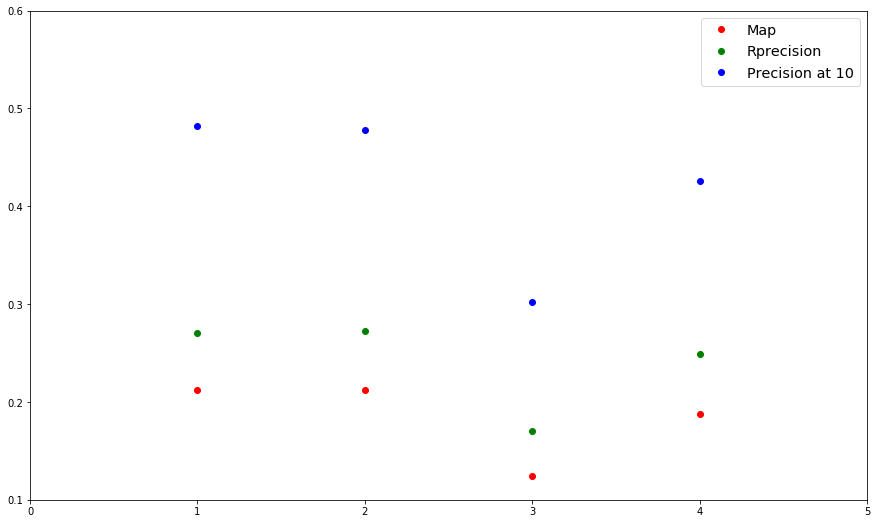

In [380]:
plt.figure(figsize=[15,9])
# plot per i map
plt.plot(map_list[:,0],map_list[:,1],'ro')
# plot per gli rprec
plt.plot(rprec_list[:,0],rprec_list[:,1],'go')
# plot per i prec at 10
plt.plot(prec_at_10_list[:,0],prec_at_10_list[:,1],'bo')
plt.axis([0,5,0.10,0.6])
plt.legend(['Map','Rprecision','Precision at 10'],fontsize='x-large')
plt.show()

La tabella è il grafico evidenziano i risultati delle diverse run. Come si può vedere, i risultati migliori si sono ottenuti con le prime due run, mentre la run 3 è quella che ha ottenuto i risultati peggiori.

## Test statistico Anova 1-way
Boxplot delle run

In [381]:
import numpy as np
import scipy.stats as stats

#definisco una funzione per estrarre i valori di precision di cui sono interessato dai rispettivi
#file .eval
def eval_extractor(path,n_topics,prec_idx):
    # apro file in lettura
    file = open(path,'r')
    lines = file.readlines()
    # inizializzo array vuota
    precs = np.zeros(n_topics)
    # itero le righe del file estraendo tutte le precision
    for i in range(len(precs)):
        raw = lines[prec_idx].split()
        precs[i] = float(raw[2])
        prec_idx += 27
    # restituisco l'array riempito
    return precs

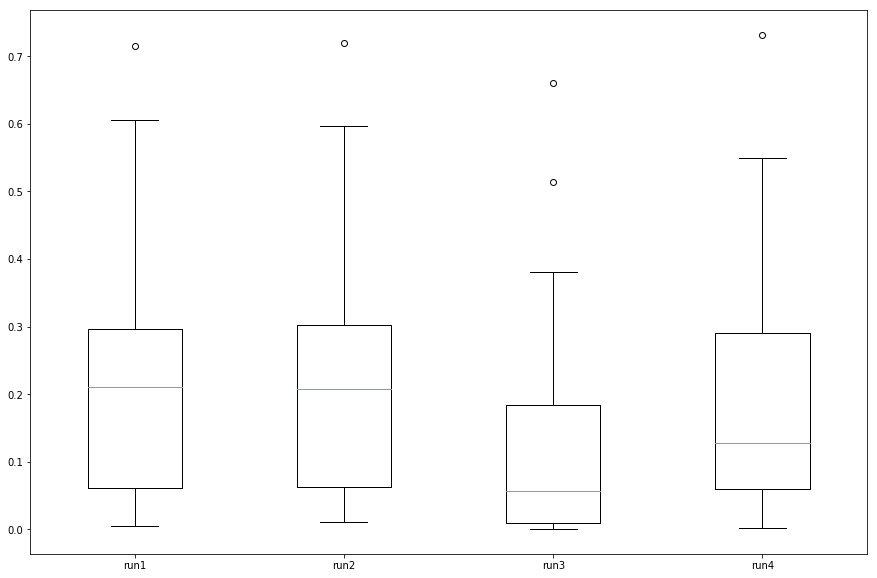

In [382]:
run_1 = eval_extractor('run1/eval/BM25b0.75_0.txt',50,3)
run_2 = eval_extractor('run2/eval/TF_IDF_1.txt',50,3)
run_3 = eval_extractor('run3/eval/BM25b0.75_2.txt',50,3)
run_4 = eval_extractor('run4/eval/TF_IDF_3.txt',50,3)
plt.figure(figsize=[15,10])
plt.boxplot([run_1,run_2,run_3,run_4], labels=['run1','run2','run3','run4'])
plt.show()

Tramite i boxplot è possibile rappresentare le diverse distribuzioni normali in maniera più comoda.Tuttavia non è sufficiente per concludere che siano diverse l'una dalle altre, motivo per il quale si ricorre al test ANOVA ad una via.

Il test ANOVA permette di verificare se due o più sistemi sono uguali, partendo dall'ipotesi nulla, ovvero che tutti i sistemi siano uguali: <br>
> $H_{0} : \mu_{1} = \mu_{2} = \mu_{3} = \mu_{4}$  

Se l'ipotesi nulla viene rifiutata, significa che vi è una differenza significativa fra almeno due sistemi. Nel test ANOVA questa condizione si verifica quando il valore di P è inferiore a quello di $\alpha$ , con $\alpha=0.05$ tipicamente.

In [383]:
# tramite la funzione f_oneway() della libreria scipy.stats eseguo il test anova 1-way
stats,p = stats.f_oneway(run_1,run_2,run_3,run_4)

print('Test Anova 1-way:')
print('Valore di F: ',stats)
print('Valore di P: ',p)

Test Anova 1-way:
Valore di F:  3.278594613256783
Valore di P:  0.022075545923528662


In base ai risultati ottenuti dal test ANOVA ad una via, posso già concludere che essendo P < 0.05, l'ipotesi nulla viene rifiutata e quindi almeno una delle run è diversa da un'altra run. Per comprendere quali sistemi appartengono al 'top group', si rende necessario il test di Tukey, il quale permette di stabilire con esattezza quali sistemi hanno permesso di violare l'ipotesi nulla.

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower  upper  reject
--------------------------------------------
 3.0    4.0    0.0632  -0.0208 0.1472 False 
 3.0    2.0    0.0878   0.0038 0.1718  True 
 3.0    1.0    0.0881   0.004  0.1721  True 
 4.0    2.0    0.0246  -0.0594 0.1087 False 
 4.0    1.0    0.0249  -0.0591 0.1089 False 
 2.0    1.0    0.0003  -0.0838 0.0843 False 
--------------------------------------------


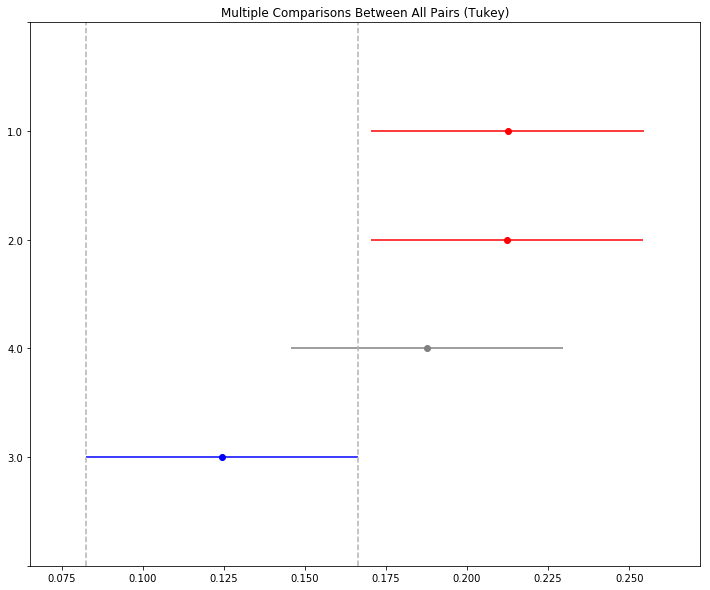

In [384]:
# importo i metodi necessari per eseguire il test tukey hsd dalla libreria statsmodels
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

# riordino la lista che contiene i map delle run in modo crescente
# la funzione MultiComparison ordina graficamente in modo diverso rispetto all'analoga funzione
# matlab spiegata a lezione, dove gli indici venivano ordinati in modo decrescente
sorted_map_list = map_list[map_list[:,1].argsort()]
# unisco tutte le precision dei topics delle diverse run in un unico array
scores = np.concatenate((run_1,run_2,run_3,run_4))
# inizializzo e creo un array con i diversi labels
labels = np.zeros(200)
labels[:50] = 1
labels[50:100] = 2
labels[100:150] = 3
labels[150:] = 4
# unisco le array labels e scores (operazione non strettamente necessaria, ma in questo modo costruisco 
# un'unica matrice che contiene nella prima colonna i labels delle run e nella seconda tutti i valori di precision)
data = np.column_stack((labels,scores))

# oggetto che permette il confronto dei dati delle diverse run
mc = MultiComparison(data[:,1],data[:,0],group_order=sorted_map_list[:,0])
# test tukey hsd (il parametro alpha=0.05 è di default, ma potrebbe essere cambiato)
result = mc.tukeyhsd()
# plot del test tukey hsd
result.plot_simultaneous(comparison_name=3,figsize=(12,10))
# stampa della tabella con i vari confronti tra le run e la verifica che la null hypothesis sia stata o no rifiuta
# segue commento
print(result)

La tabella mostra che l'ipotesi nulla è rifiutata nel confronto fra le run 2 e 3 e fra le run 1 e 3. Il risultato è ulteriormente evidenziato nel plot. Si può quindi concludere che la run 3 non appartenga sicuramete al top group. Per quanto riguarda la run 4, essa non viola l'ipotesi nulla con nessuna delle altre run, tuttavia il suo intervallo di confidenza evidenzia una certa differenza con le run 1 e 2 che con la run 3. Per questo motivo, si potrebbe non considerarla appartenente al top group che quindi è formato dalle run 1 e 2, che anche nei test precedenti avevano dimostrato risultati migliori.